In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score ,recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd

In [3]:
def loading_csv():
    return pd.read_csv(r"D:\Mateo Leon\Desktop\Tesis\SPAM\Preprocesamiento\procesamiento.csv", delimiter=",", na_values="n/a")

In [4]:
data = loading_csv()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7547 entries, 0 to 7546
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   has_uppercase_word        7547 non-null   int64
 1   Number_of_!_subject       7547 non-null   int64
 2   number_of_!_text          7547 non-null   int64
 3   number_of_clicks_text     7547 non-null   int64
 4   text_has_external_url     7547 non-null   int64
 5   number_of_free_subject    7547 non-null   int64
 6   number_of_free_text       7547 non-null   int64
 7   number_of_free            7547 non-null   int64
 8   contains_html_data        7547 non-null   int64
 9   dictionary_count_text     7547 non-null   int64
 10  dictionary_count_subject  7547 non-null   int64
 11  tipo                      7547 non-null   int64
dtypes: int64(12)
memory usage: 707.6 KB


In [5]:
from pandas_profiling import ProfileReport

In [6]:
ProfileReport(loading_csv())


In [7]:
features = data.columns[0:11]
x = data[features]

In [8]:
labels = data.columns[11:]
y = data[labels].values.ravel()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
clf_GNB = GaussianNB()
clf_GNB.fit(x_train, y_train)

GaussianNB()

In [11]:
param_grid = [
    {'var_smoothing': np.logspace(0,-9,num=100)}
]
gs_NB = GridSearchCV(clf_GNB, param_grid)
gs_NB.fit(x_train, y_train)
y_gs_NB = gs_NB.predict(x_test)
visualizer_GNBCV = classification_report(y_test, y_gs_NB, target_names=["ham", "spam"])
print(gs_NB.best_params_)

{'var_smoothing': 1.873817422860383e-06}


In [12]:
y_pred_GNB = clf_GNB.predict(x_test)
y_pred_GNB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
precision_GNB = precision_score(y_test, y_pred_GNB)
recall_GNB = recall_score(y_test, y_pred_GNB)
f1_GNB = f1_score(y_test, y_pred_GNB)
visualizer_GNB = classification_report(y_test, y_pred_GNB, target_names=["ham", "spam"])
print(visualizer_GNB)

              precision    recall  f1-score   support

         ham       0.67      0.93      0.78      1085
        spam       0.80      0.37      0.50       802

    accuracy                           0.69      1887
   macro avg       0.73      0.65      0.64      1887
weighted avg       0.72      0.69      0.66      1887



In [14]:
clfLR = LogisticRegression(random_state=0)
clfLR_fit = clfLR.fit(x_train,y_train)
y_pred_lr = clfLR_fit.predict(x_test)
visualizer_lr = classification_report(y_test, y_pred_lr, target_names=["ham", "spam"])
print(visualizer_lr)

              precision    recall  f1-score   support

         ham       0.79      0.85      0.82      1085
        spam       0.78      0.70      0.74       802

    accuracy                           0.79      1887
   macro avg       0.79      0.78      0.78      1887
weighted avg       0.79      0.79      0.79      1887



In [15]:
param_grid_clLR = [{'penalty': [ 'l1','l2'], 'C': np.logspace(-4, 4, 20), 'solver':['newton-cg', 'liblinear']}]
gs_LR = GridSearchCV(clfLR, param_grid_clLR)
gs_LR.fit(x_train, y_train)
y_gs_LR = gs_LR.predict(x_test)
visualizer_LRCV = classification_report(y_test, y_gs_LR, target_names=["ham", "spam"])
###print(visualizer_RFCV)
print(gs_LR.best_params_)

d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\mateo leon\desktop

d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\mateo leon\desktop

d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\mateo leon\desktop\tesis\spam\jupyterdellibro\my_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\mateo leon\desktop

{'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}


In [16]:
clfRF = RandomForestClassifier(n_estimators=100)
clfRF.fit(x_train,y_train)
y_pred_rf = clfRF.predict(x_test)

In [18]:
grid_params_RF = { 'n_estimators': [50,100,250], 'max_features': [2, 3], 'min_samples_split': [2,4,6], 
                 'max_depth': [80,90,100,110], 'bootstrap':[True, False] }
gs_RF = GridSearchCV(clfRF, grid_params_RF)
gs_RF.fit(x_train, y_train)
y_gs_RF = gs_RF.predict(x_test)
visualizer_gs_rf = classification_report(y_test, y_gs_RF, target_names=["ham", "spam"])
print(visualizer_gs_rf)
###print(gs_RF.best_params_)

              precision    recall  f1-score   support

         ham       0.86      0.90      0.88      1085
        spam       0.86      0.80      0.83       802

    accuracy                           0.86      1887
   macro avg       0.86      0.85      0.85      1887
weighted avg       0.86      0.86      0.86      1887



In [19]:
feature_imp_RF = pd.Series(clfRF.feature_importances_,index=x_train.columns.values).sort_values(ascending=False)
feature_imp_RF

text_has_external_url       0.281647
number_of_!_text            0.175873
number_of_clicks_text       0.164567
dictionary_count_text       0.159297
Number_of_!_subject         0.067845
dictionary_count_subject    0.042428
contains_html_data          0.036255
has_uppercase_word          0.031256
number_of_free              0.020622
number_of_free_text         0.016299
number_of_free_subject      0.003911
dtype: float64

In [20]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
visualizer_rf = classification_report(y_test, y_pred_rf, target_names=["ham", "spam"])
print(visualizer_rf)

              precision    recall  f1-score   support

         ham       0.85      0.90      0.88      1085
        spam       0.86      0.79      0.82       802

    accuracy                           0.85      1887
   macro avg       0.85      0.85      0.85      1887
weighted avg       0.85      0.85      0.85      1887



In [21]:
clf_SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
clf_SGD.fit(x_train, y_train)
y_pred_SGD = clf_SGD.predict(x_test)

In [22]:
clf_SGD.score(x_test, y_test)
f1_SGD = f1_score(y_test, y_pred_SGD)
visualizer_SGD = classification_report(y_test, y_pred_SGD, target_names=["ham", "spam"])
print(visualizer_SGD)

              precision    recall  f1-score   support

         ham       0.78      0.84      0.81      1085
        spam       0.76      0.69      0.72       802

    accuracy                           0.77      1887
   macro avg       0.77      0.76      0.76      1887
weighted avg       0.77      0.77      0.77      1887



In [23]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
yP = knn.predict(x_test)

In [24]:
grid_params_KNN = { 'n_neighbors': list(range(1,30)), 'leaf_size': list(range(1,50)), 'p':[1,2], 'weights':['uniform', 'distance']}
gs_KNN = GridSearchCV(knn, grid_params_KNN)
gs_KNN.fit(x_train, y_train)
y_gs_KNN = gs_KNN.predict(x_test)
visualizer_gs_KNN = classification_report(y_test, y_gs_KNN, target_names=["ham", "spam"])
print(visualizer_gs_KNN)

              precision    recall  f1-score   support

         ham       0.83      0.90      0.87      1085
        spam       0.85      0.76      0.80       802

    accuracy                           0.84      1887
   macro avg       0.84      0.83      0.83      1887
weighted avg       0.84      0.84      0.84      1887



In [25]:
print(gs_RF.best_params_)

{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_split': 6, 'n_estimators': 250}


In [26]:
f1_kN = f1_score(y_test, yP)
recall_KN = recall_score(y_test, yP)
precision_KN = precision_score(y_test, yP)
accuracy_KN = accuracy_score(y_test, yP)
visualizer_kn = classification_report(y_test, yP, target_names=["ham", "spam"])
print(visualizer_kn)

              precision    recall  f1-score   support

         ham       0.82      0.82      0.82      1085
        spam       0.76      0.75      0.75       802

    accuracy                           0.79      1887
   macro avg       0.79      0.79      0.79      1887
weighted avg       0.79      0.79      0.79      1887



In [27]:
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=5)
dtree.fit(x_train, y_train)
y_pred_DT = dtree.predict(x_test)

In [28]:
grid_params_DT = { 'criterion':['gini','entropy'], 'max_depth': list(range(1,20)), 'min_samples_split': list(range(2,20)), 'splitter':['best', 'random'], }
gs_DT = GridSearchCV(dtree, grid_params_DT)
gs_DT.fit(x_train, y_train)
y_gs_DT = gs_DT.predict(x_test)
visualizer_gs_DT = classification_report(y_test, y_gs_DT, target_names=["ham", "spam"])
print(visualizer_gs_DT)

              precision    recall  f1-score   support

         ham       0.84      0.90      0.87      1085
        spam       0.85      0.76      0.80       802

    accuracy                           0.84      1887
   macro avg       0.84      0.83      0.84      1887
weighted avg       0.84      0.84      0.84      1887



In [29]:
print(gs_DT.best_params_)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 2, 'splitter': 'best'}


In [30]:
f1_DT = f1_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
visualizer_dt = classification_report(y_test, y_pred_DT, target_names=["ham", "spam"])
print(visualizer_dt)

              precision    recall  f1-score   support

         ham       0.83      0.91      0.87      1085
        spam       0.86      0.75      0.80       802

    accuracy                           0.84      1887
   macro avg       0.85      0.83      0.84      1887
weighted avg       0.84      0.84      0.84      1887



In [31]:
svm = SVC(gamma='scale', C=1.0, random_state=101)
svm.fit(x_train, y_train)
y_pred_SVM = svm.predict(x_test)

In [32]:
grid_params_SVM = { 'C':[0.001,0.01,0.1,1, 10], 'gamma':['auto'],'degree': list(range(1,30)) }
gs_SVM = GridSearchCV(svm, grid_params_SVM)
gs_SVM.fit(x_train, y_train)
y_gs_SVM = gs_SVM.predict(x_test)
visualizer_gs_SVM = classification_report(y_test, y_gs_SVM, target_names=["ham", "spam"])
print(visualizer_gs_DT)

              precision    recall  f1-score   support

         ham       0.84      0.90      0.87      1085
        spam       0.85      0.76      0.80       802

    accuracy                           0.84      1887
   macro avg       0.84      0.83      0.84      1887
weighted avg       0.84      0.84      0.84      1887



In [33]:
print(gs_SVM.best_params_)

{'C': 10, 'degree': 1, 'gamma': 'auto'}


In [34]:
f1_SVM = f1_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

In [35]:
visualizer_svm = classification_report(y_test, y_pred_SVM, target_names=["ham", "spam"])
print(visualizer_svm)

              precision    recall  f1-score   support

         ham       0.78      0.85      0.82      1085
        spam       0.77      0.68      0.73       802

    accuracy                           0.78      1887
   macro avg       0.78      0.77      0.77      1887
weighted avg       0.78      0.78      0.78      1887



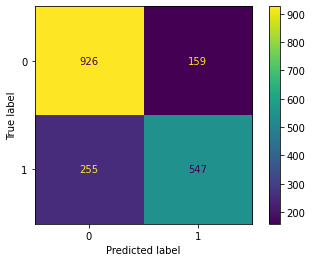

In [36]:
plot_confusion_matrix(svm, x_test, y_test)

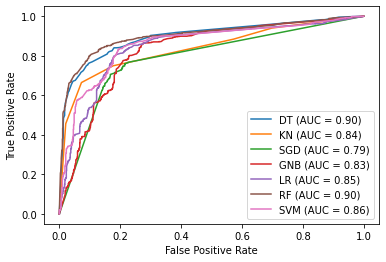

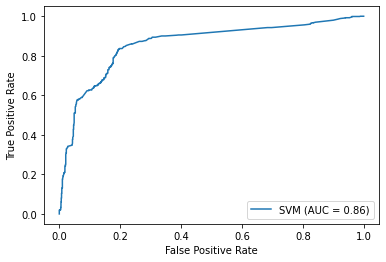

In [37]:
ax = plt.gca()
roc_curve_svm = plot_roc_curve(svm, x_test, y_test, name='SVM')
roc_curve_dt = plot_roc_curve(dtree, x_test,y_test, name='DT',ax=ax)
roc_curve_kn = plot_roc_curve(knn, x_test,y_test, name='KN',ax=ax)
roc_curve_sgd = plot_roc_curve(clf_SGD, x_test,y_test, name='SGD',ax=ax)
roc_curve_gnb = plot_roc_curve(clf_GNB, x_test,y_test, name='GNB',ax=ax)
roc_curve_lr = plot_roc_curve(clfLR, x_test,y_test, name='LR',ax=ax)
roc_curve_rf = plot_roc_curve(clfRF, x_test,y_test, name='RF',ax=ax)

plt.rcParams['figure.figsize'] = [15, 5]
roc_curve_svm.plot(ax=ax)

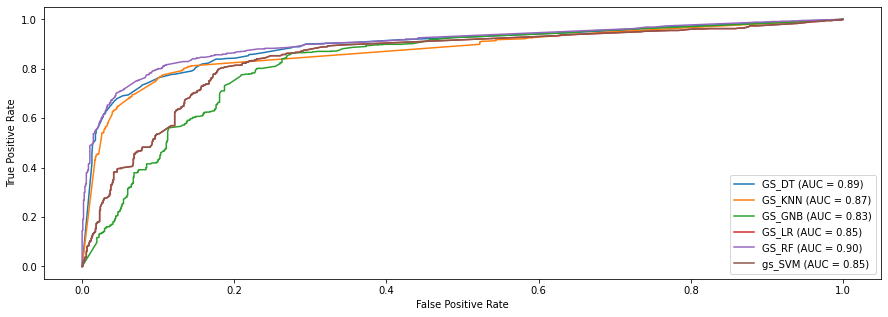

In [43]:
ax = plt.gca()
roc_curve_a = plot_roc_curve(gs_DT, x_test,y_test, name='GS_DT',ax=ax)
roc_curve_b = plot_roc_curve(gs_KNN, x_test,y_test, name='GS_KNN',ax=ax)
roc_curve_c = plot_roc_curve(gs_NB, x_test,y_test, name='GS_GNB',ax=ax)
roc_curve_d = plot_roc_curve(gs_LR, x_test,y_test, name='GS_LR',ax=ax)
roc_curve_e = plot_roc_curve(gs_RF, x_test,y_test, name='GS_RF',ax=ax)


plt.rcParams['figure.figsize'] = [15, 5]
roc_curve_gs.plot(ax=ax)